# Iris dataset

In [1]:
import tensorflow as tf
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
# Read data
iris = datasets.load_iris()

X = iris.data
y = iris.target
# Split data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y
)
# Standardization
sc = StandardScaler()
sc.fit(X_train)
#X_train_std = sc.transform(X_train)
#X_test_std = sc.transform(X_test)

X_train_std = X_train
X_test_std = X_test

In [3]:
tf.keras.backend.clear_session()

model = tf.keras.Sequential([
    tf.keras.Input(shape=(4,)),
    tf.keras.layers.Dense(units=16, activation='sigmoid', name='hidden1'),
    tf.keras.layers.Dense(units=3, name='output', activation='softmax')
    ])

model.summary()

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden1 (Dense)              (None, 16)                80        
_________________________________________________________________
output (Dense)               (None, 3)                 51        
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


In [4]:
tf_fit = model.fit(x=X_train, y=y_train,
        batch_size=16,
        validation_split=0.1,
        epochs=100, 
        verbose=1)

Epoch 1/100
6/6 [==============================] - 1s 55ms/step - loss: 1.1815 - accuracy: 0.3617 - val_loss: 1.5895 - val_accuracy: 0.0909
Epoch 2/100
6/6 [==============================] - 0s 13ms/step - loss: 1.1440 - accuracy: 0.3617 - val_loss: 1.5173 - val_accuracy: 0.0909
Epoch 3/100
6/6 [==============================] - 0s 13ms/step - loss: 1.1116 - accuracy: 0.3617 - val_loss: 1.4524 - val_accuracy: 0.0909
Epoch 4/100
6/6 [==============================] - 0s 13ms/step - loss: 1.0817 - accuracy: 0.3617 - val_loss: 1.3942 - val_accuracy: 0.0909
Epoch 5/100
6/6 [==============================] - 0s 4ms/step - loss: 1.0604 - accuracy: 0.3617 - val_loss: 1.3361 - val_accuracy: 0.0909
Epoch 6/100
6/6 [==============================] - 0s 5ms/step - loss: 1.0366 - accuracy: 0.3617 - val_loss: 1.2855 - val_accuracy: 0.0909
Epoch 7/100
6/6 [==============================] - 0s 4ms/step - loss: 1.0173 - accuracy: 0.3617 - val_loss: 1.2365 - val_accuracy: 0.0909
Epoch 8/100
6/6 [======

In [5]:
for key, val in tf_fit.history.items():
    print( f'{key:20s}: {[ f"{i:3.2f}" for i in val[:5]]}')

loss                : ['1.18', '1.14', '1.11', '1.08', '1.06']
accuracy            : ['0.36', '0.36', '0.36', '0.36', '0.36']
val_loss            : ['1.59', '1.52', '1.45', '1.39', '1.34']
val_accuracy        : ['0.09', '0.09', '0.09', '0.09', '0.09']


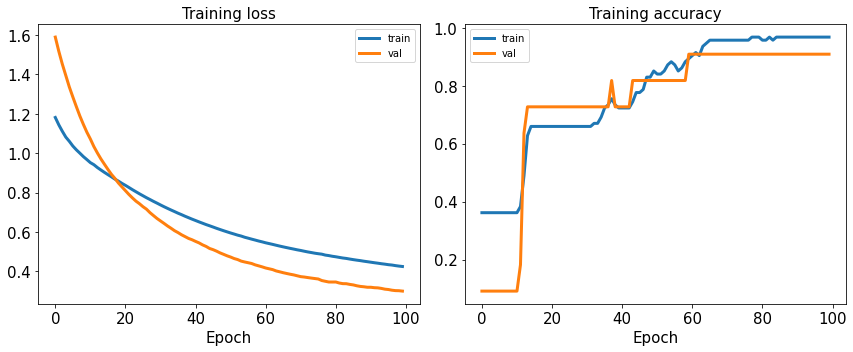

In [6]:
hist = tf_fit.history

fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(hist['loss'], lw=3)
ax.plot(hist['val_loss'], lw=3)
ax.set_title('Training loss', size=15)
ax.set_xlabel('Epoch', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.legend(['train','val'])

ax = fig.add_subplot(1, 2, 2)
ax.plot(hist['accuracy'], lw=3)
ax.plot(hist['val_accuracy'], lw=3)
ax.set_title('Training accuracy', size=15)
ax.set_xlabel('Epoch', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)
plt.tight_layout()
ax.legend(['train','val'])

In [7]:
results = model.evaluate(X_test, y_test, verbose=0)
print(f'Test loss: {results[0]:.4f}   Test Acc.: {results[1]:.4f}')

Test loss: 0.4122   Test Acc.: 0.9778


In [8]:
y_hat = model(X_test[:3])
print(y_hat.numpy())

[[0.02109063 0.3603458  0.6185636 ]
 [0.9007059  0.08524593 0.01404816]
 [0.90448993 0.08132184 0.01418816]]


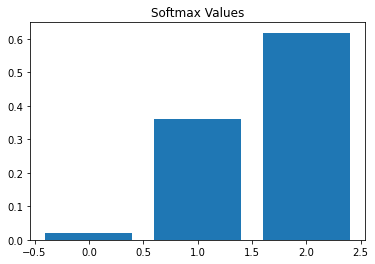

In [9]:
yp = y_hat.numpy()[0]
xp = list(range(yp.shape[0]))
plt.bar(xp, yp)
plt.title('Softmax Values')
plt.show()